In [19]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [20]:
file_path = "data/UP_gesture_data_1.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Parameters for noise
noise_std = 1  # Standard deviation of noise (adjust as needed)

# Columns to which noise will be added
columns = ['gyro_x', 'gyro_y', 'gyro_z', 'acce_x', 'acce_y', 'acce_z']

# Function to add noise
def add_noise(data, columns, noise_std):
    noisy_data = data.copy()
    for col in columns:
        noisy_data[col] += np.random.normal(0, noise_std, size=noisy_data.shape[0])
    return noisy_data

# Generate noisy data
noisy_data = add_noise(data, columns, noise_std)

In [21]:
noisy_data.to_csv("Synthetic_data/UP_gesture_data_21.csv", index=False)

In [22]:
def gyro_plot(file):
    # Extract individual sensor data (gyro and accelerometer)
    if ".csv" in file:
        #label = file.split("_")[0].split("\\")[1]
        df = pd.read_csv(file)
        csv = True
    else:
        #print(file)
        csv = False
        #label = file.split("/")[2].split("\\")[0]
        with open(file, 'r') as file:
            lines = file.readlines()

        # Split lines into header and data
        header = lines[0].strip().split("\t")  # Assuming tab-separated values
        header = [head.strip() for head in header]
        data = [line.strip().split("\t") for line in lines[1:]]  # Skip header row

        # Convert data to a pandas DataFrame
        df = pd.DataFrame(data, columns=header)

    df[['gyro_x', 'gyro_y', 'gyro_z', 'acce_x', 'acce_y', 'acce_z']] = df[
        ['gyro_x', 'gyro_y', 'gyro_z', 'acce_x', 'acce_y', 'acce_z']
    ].apply(pd.to_numeric, errors='coerce')
    gyro_x = df['gyro_x'].values
    gyro_y = df['gyro_y'].values
    gyro_z = df['gyro_z'].values
    acce_x = df['acce_x'].values
    acce_y = df['acce_y'].values
    acce_z = df['acce_z'].values

    # Number of samples (N) and sampling interval (T)
    N = len(gyro_x[:400])  # Assuming all columns have the same number of samples
    T = 1/100  # Replace with the actual sampling rate (T = 1 / sampling frequency)
    fs = 1/T

    # Plotting the time-domain data for gyroscope and accelerometer
    plt.figure(figsize=(10, 5))

    # Plot Gyroscope time-domain data
    #plt.subplot(2, 1, 1)
    plt.plot(np.arange(N) * T, gyro_x[:400], label='Gyro X')
    plt.plot(np.arange(N) * T, gyro_y[:400], label='Gyro Y')
    plt.plot(np.arange(N) * T, gyro_z[:400], label='Gyro Z')
    plt.title('Time Domain - Gyroscope Data')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()

    # Plot Accelerometer time-domain data
#     plt.subplot(2, 1, 2)
#     plt.plot(np.arange(N) * T, acce_x[:400], label='Acce X')
#     plt.plot(np.arange(N) * T, acce_y[:400], label='Acce Y')
#     plt.plot(np.arange(N) * T, acce_z[:400], label='Acce Z')
#     plt.title('Time Domain - Accelerometer Data')
#     plt.xlabel('Time (s)')
#     plt.ylabel('Amplitude')
#     plt.legend()
#     plt.grid()
    
    plt.tight_layout()
    plt.show()

In [23]:
def acce_plot(file):
    # Extract individual sensor data (gyro and accelerometer)
    if ".csv" in file:
        #label = file.split("_")[0].split("\\")[1]
        df = pd.read_csv(file)
        csv = True
    else:
        #print(file)
        csv = False
        #label = file.split("/")[2].split("\\")[0]
        with open(file, 'r') as file:
            lines = file.readlines()

        # Split lines into header and data
        header = lines[0].strip().split("\t")  # Assuming tab-separated values
        header = [head.strip() for head in header]
        data = [line.strip().split("\t") for line in lines[1:]]  # Skip header row

        # Convert data to a pandas DataFrame
        df = pd.DataFrame(data, columns=header)

    df[['gyro_x', 'gyro_y', 'gyro_z', 'acce_x', 'acce_y', 'acce_z']] = df[
        ['gyro_x', 'gyro_y', 'gyro_z', 'acce_x', 'acce_y', 'acce_z']
    ].apply(pd.to_numeric, errors='coerce')
    
    gyro_x = df['gyro_x'].values
    gyro_y = df['gyro_y'].values
    gyro_z = df['gyro_z'].values
    acce_x = df['acce_x'].values
    acce_y = df['acce_y'].values
    acce_z = df['acce_z'].values

    # Number of samples (N) and sampling interval (T)
    N = len(gyro_x[:400])  # Assuming all columns have the same number of samples
    T = 1/100  # Replace with the actual sampling rate (T = 1 / sampling frequency)
    fs = 1/T

    # Plotting the time-domain data for gyroscope and accelerometer
    plt.figure(figsize=(10, 5))


    # Plot Accelerometer time-domain data
    plt.plot(np.arange(N) * T, acce_x[:400], label='Acce X')
    plt.plot(np.arange(N) * T, acce_y[:400], label='Acce Y')
    plt.plot(np.arange(N) * T, acce_z[:400], label='Acce Z')
    plt.title('Time Domain - Accelerometer Data')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

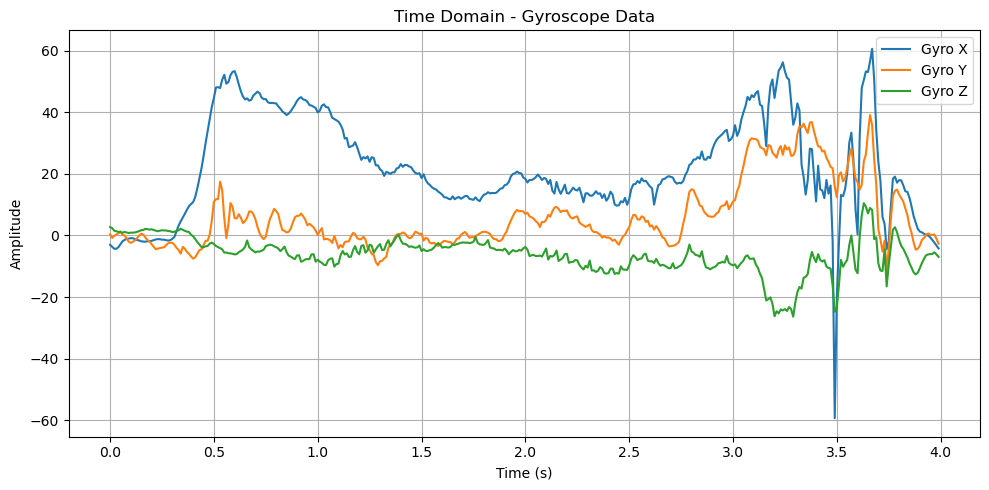

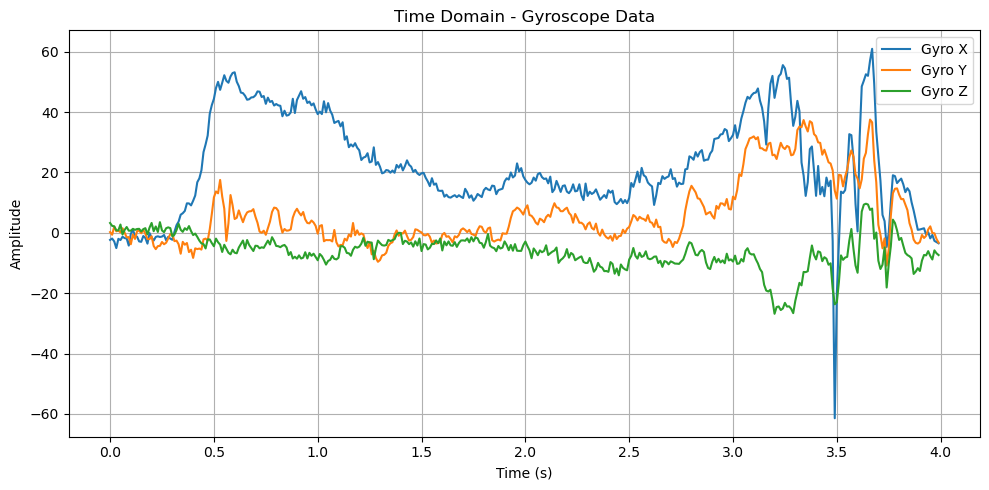

In [24]:
gyro_plot("Data/UP_gesture_data_1.csv")
gyro_plot("Synthetic_data/UP_gesture_data_21.csv")